In [3]:
# import os,glob

# path = os.getcwd()
# print(path)
# os.listdir()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [64]:
df = pd.read_csv('../data/df.csv', encoding='utf-8') 

In [7]:
death = pd.read_csv('../data/12_20_death.csv', encoding='utf-8')
# 'utf-8' codec can't decode byte 0xb9 in position 0: invalid start byte
# 연결프로그램 메모장으로 들어가서 - 파일 - 다른이름저장 - 인코딩 utf-8, 덮어쓰기


## 가해자 연령 있음

In [68]:
# regis = pd.read_excel('../data/2017_2020_연령별면허소지자_서울.xls', header= 1)
regis = pd.read_csv('../data/regis.csv', encoding='utf-8')

In [69]:
regis

,Unnamed: 0,기간,연령별,계,소계,1종_대형,1종_보통,1종_소형,1종_특수,소계.1,2종_보통,2종_소형,2종_원동기,grade
0,0,2017,합계,7712062,3644317,256628,3346556,122,41011,4067745,3721811,98848,247086,고령운전자
1,1,2017,16-19세,37171,13103,63,13027,-,13,24068,17521,314,6233,비고령운전자
2,2,2017,20-24세,379849,151434,6617,144059,-,758,228415,205048,3113,20254,비고령운전자
3,3,2017,25-29세,655296,301034,15233,283904,-,1897,354262,317441,8546,28275,비고령운전자
4,4,2017,30-34세,736690,379629,17441,360031,-,2157,357061,318641,13822,24598,비고령운전자
5,5,2017,35-39세,846979,452937,22436,426896,-,3605,394042,350034,18771,25237,비고령운전자
6,6,2017,40-44세,899735,422117,24183,393285,-,4649,477618,435608,16766,25244,비고령운전자
7,7,2017,45-49세,1017259,472927,32547,433653,-,6727,544332,512579,13749,18004,비고령운전자
8,8,2017,50-54세,858577,406785,33003,367853,-,5929,451792,423628,9498,18666,비고령운전자
9,9,2017,55-59세,857522,406075,36957,363547,-,5571,451447,422027,6562,22858,비고령운전자


In [10]:
# regis.drop(['계', '소계','소계.1'], axis=1, inplace=True)
# regis

In [207]:
# 판다스 컬럼값 조건으로 행 삭제
# regis.drop(regis.loc[regis['연령별'] == '합계'].index, inplace=True)
#https://www.delftstack.com/ko/howto/python-pandas/how-to-delete-dataframe-row-in-pandas-based-on-column-value/


In [244]:
regis

,기간,연령별,대형,보통,소형,특수,보통.1,소형.1,원동기
1,2017,16-19세,63,13027,-,13,17521,314,6233
2,2017,20-24세,6617,144059,-,758,205048,3113,20254
3,2017,25-29세,15233,283904,-,1897,317441,8546,28275
4,2017,30-34세,17441,360031,-,2157,318641,13822,24598
5,2017,35-39세,22436,426896,-,3605,350034,18771,25237
6,2017,40-44세,24183,393285,-,4649,435608,16766,25244
7,2017,45-49세,32547,433653,-,6727,512579,13749,18004
8,2017,50-54세,33003,367853,-,5929,423628,9498,18666
9,2017,55-59세,36957,363547,-,5571,422027,6562,22858
10,2017,60-64세,30232,269941,-,4286,317830,4155,21434


In [240]:
regis.columns

Index(['기간', '연령별', ' 대형', '보통', '소형', '특수', '보통.1', '소형.1', '원동기'], dtype='object')

In [239]:
regis.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
            37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            55, 56, 57, 58, 59],
           dtype='int64')

In [11]:
# 컬럼,인덱스 변경
regis = regis.rename(columns={' 대형': '1종_대형', '보통': '1종_보통', '소형': '1종_소형', '특수': '1종_특수',
                     '보통.1': '2종_보통', '소형.1': '2종_소형', '원동기': '2종_원동기'})

# regis = regis.rename(columns={ '2종_보통.1': '2종_소형',})
# 인덱스 이름을 변경하고 싶은 경우에는 index를 설정합니다.
# 컬럼 이름을 변경하고 싶은 경우에는 colunms를 설정
# https://ponyozzang.tistory.com/623


In [266]:
# 피봇,,,실패 ㅎ
# 출처: https://data-make.tistory.com/135 [Data Makes Our Future])

In [247]:
# regis.to_csv('regis.csv', encoding='utf-8-sig')

In [ ]:
# regis_df = pd.pivot_table(df,                # 피벗할 데이터프레임
#                      index = 'class',    # 행 위치에 들어갈 열
#                      columns = 'sex',    # 열 위치에 들어갈 열
#                      values = 'survived', )    # 데이터로 사용할 열
#                      aggfunc = ['mean', 'sum'])   # 데이터 집계함수
# regis_df
# https://yganalyst.github.io/data_handling/Pd_14/

In [142]:
df

,Unnamed: 0,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,...,지점명,위도,경도,자치구,Unnamed: 0.1,0,0.1,0.0,grade,class
0,0,2017,3,2,목요일,11,경상사고,0,0,1,...,구역삼세무서,37.498266,127.030105,강남구,NaN,NaN,NaN,NaN,20~29,65세 미만 운전자
1,1,2017,3,5,일요일,12,경상사고,0,0,2,...,구역삼세무서,37.498266,127.030105,강남구,NaN,NaN,NaN,NaN,60~69,65세 미만 운전자
2,3,2017,4,21,금요일,1,중상사고,0,2,0,...,구역삼세무서,37.498266,127.030105,강남구,NaN,NaN,NaN,NaN,30~39,65세 미만 운전자
3,6,2017,5,11,목요일,14,중상사고,0,1,0,...,구역삼세무서,37.498266,127.030105,강남구,NaN,NaN,NaN,NaN,40~49,65세 미만 운전자
4,8,2017,7,3,월요일,2,부상사고,0,0,0,...,구역삼세무서,37.498266,127.030105,강남구,NaN,NaN,NaN,NaN,50~59,65세 미만 운전자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13682,867,2019,4,4,목요일,14,경상사고,0,0,1,...,중화중삼거리,37.586616,127.094805,중랑구,23.0,NaN,NaN,NaN,30~39,65세 미만 운전자
13683,868,2019,7,9,화요일,15,경상사고,0,0,1,...,중화중삼거리,37.586616,127.094805,중랑구,24.0,NaN,NaN,NaN,50~59,65세 미만 운전자
13684,869,2019,9,16,월요일,8,중상사고,0,1,0,...,중화중삼거리,37.586616,127.094805,중랑구,25.0,NaN,NaN,NaN,70~79,65세 이상 고령운전자
13685,870,2019,10,2,수요일,9,경상사고,0,0,3,...,중화중삼거리,37.586616,127.094805,중랑구,26.0,NaN,NaN,NaN,40~49,65세 미만 운전자


In [69]:
#import pandas as pd
# df.to_csv('서울시.csv', encoding='utf-8-sig')

In [143]:
df.columns

Index(['Unnamed: 0', '년도', '월', '일', '요일', '시각', '사고등급', '사망자수', '중상자수',
       '경상자수', '부상자수', '연령', '성별', '경력', '음주', '종별', '용도', '관련자2', '사고형태',
       '기상상태', '일광상태', '사고유형1', '사고유형2', '법규위반', '도로종류', '지점명', '위도', '경도',
       '자치구', 'Unnamed: 0.1', '0', '0.1', '0.0', 'grade', 'class'],
      dtype='object')

In [70]:
# df['Unnamed: 0'].unique()

In [17]:
df['연령'].unique()

array(['29', '61', '48', '33', '32', '59', '46', '44', '55', '49', '36',
       '38', '56', '24', '52', '74', '34', '30', '27', '42', '51', '43',
       '58', '39', '40', '26', '68', '65', '60', '54', '64', '67', '23',
       '71', '50', '73', '11', '72', '70', '28', '69', '62', '75', '25',
       '63', '47', '66', '41', '31', '77', '37', '35', '57', '53', '20',
       '불명', '45', '88', '78', '76', '85', '21', '22', '81', '83', '80',
       '19', '18', '17', '79', '82', '87', '16', '15', '13', '98', '14',
       '84', '12', '07', '89', '86', '10', '95'], dtype=object)

In [18]:
# df = df.drop(df[df['연령'] == '불명'].index)

In [19]:
# df['연령'].unique()

array(['29', '61', '33', '46', '55', '38', '24', '52', '74', '58', '39',
       '42', '65', '54', '64', '26', '44', '67', '34', '71', '40', '50',
       '73', '60', '43', '11', '70', '62', '75', '69', '28', '25', '27',
       '51', '63', '49', '47', '36', '59', '48', '32', '41', '31', '77',
       '37', '53', '57', '35', '66', '56', '45', '20', '68', '88', '72',
       '23', '30', '78', '76', '85', '21', '22', '83', '80', '19', '17',
       '79', '82', '87', '81', '15', '18', '13', '98', '16', '14', '84',
       '12', '86', '89'], dtype=object)

In [20]:
# df = df.astype({'연령':'int'})
# #https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=221652121166
# #df = df.astype({'연령':'int'}).dtype 할 경우 오류생김


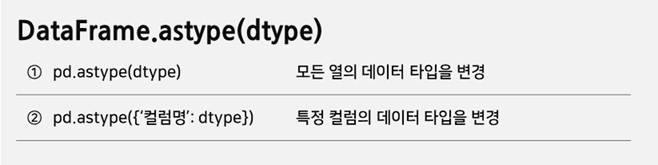

In [21]:
# # https://nalara12200.tistory.com/162
# grades = [] #리스트 생성
# for row in df['연령'] : #'average' 값을 얻어옴 
#     if row >= 90: 
#         grades.append('90~') #나이 90세 이상이면 grades에 90세 이상을 추가 
#     elif row >= 80: 
#         grades.append('80~89')
#     elif row >= 70: 
#         grades.append('70~79')
#     elif row >= 60: 
#         grades.append('60~69')
#     elif row >= 50: 
#         grades.append('50~59')
#     elif row >= 40: 
#         grades.append('40~49')
#     elif row >= 30: 
#         grades.append('30~39')
#     elif row >= 20: 
#         grades.append('20~29')
#     elif row >= 10: 
#         grades.append('10~19')
#     else : 
#         grades.append('~10') 
# df['grade'] = grades #grade열에 순차대로 원소를 대입

# # 출처: https://nalara12200.tistory.com/162 [IT, 정보보안 자료실] 
# # TypeError: 'numpy.dtype[int32]' object is not iterable
# # 리스트가 아닌 '정수'로 놓은 경우 
# # df = df.astype({'연령':'int'}).dtype  하면 생기는 오류
# # df.concat 다시 하고 df = df.astype({'연령':'int'})   으로 돌려서 다시 돌리기
# # https://hogni.tistory.com/70

In [51]:
# classes = [] #리스트 생성
# for row in df['연령'] : #'average' 값을 얻어옴 
#     if row >= 65: 
#         classes.append('65세 이상 고령운전자') #나이 90세 이상이면 grades에 90세 이상을 추가 
#     else : 
#         classes.append('65세 미만 운전자') 
# df['class'] = classes #grade열에 순차대로 원소를 대입

In [12]:
targets = [] #리스트 생성
for row in df['class'] : #'average' 값을 얻어옴 
    if row == '65세 이상 고령운전자': 
        targets.append(1) #나이 90세 이상이면 grades에 90세 이상을 추가 
    else : 
        targets.append(0) 
df['target'] = targets #grade열에 순차대로 원소를 대입

# df.to_csv('df_seoul.csv', encoding='utf-8-sig')


In [232]:
df['target'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:>

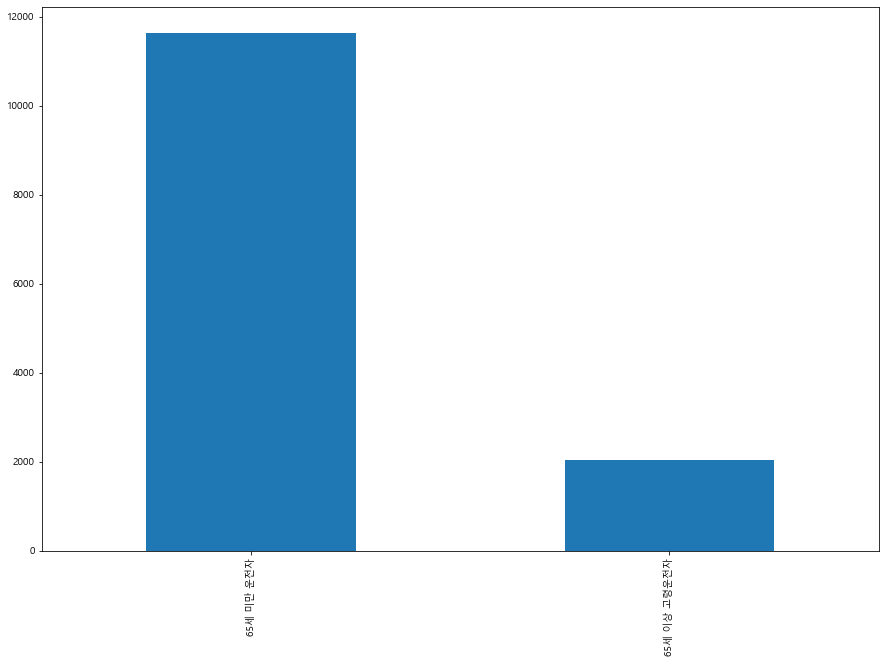

In [64]:
plt.figure(figsize=(15,10))
df['class'].value_counts().plot.bar()

In [75]:
df.columns

Index(['년도', '월', '일', '요일', '시각', '사고등급', '사망자수', '중상자수', '경상자수', '부상자수',
       '연령', '성별', '경력', '음주', '종별', '용도', '관련자2', '사고형태', '기상상태', '일광상태',
       '사고유형1', '사고유형2', '법규위반', '도로종류', '지점명', '위도', '경도', '자치구',
       'Unnamed: 0', '0', '0.1', '0.0', 'grade', 'class', 'target'],
      dtype='object')

### 연령대별 사고수

<AxesSubplot:>

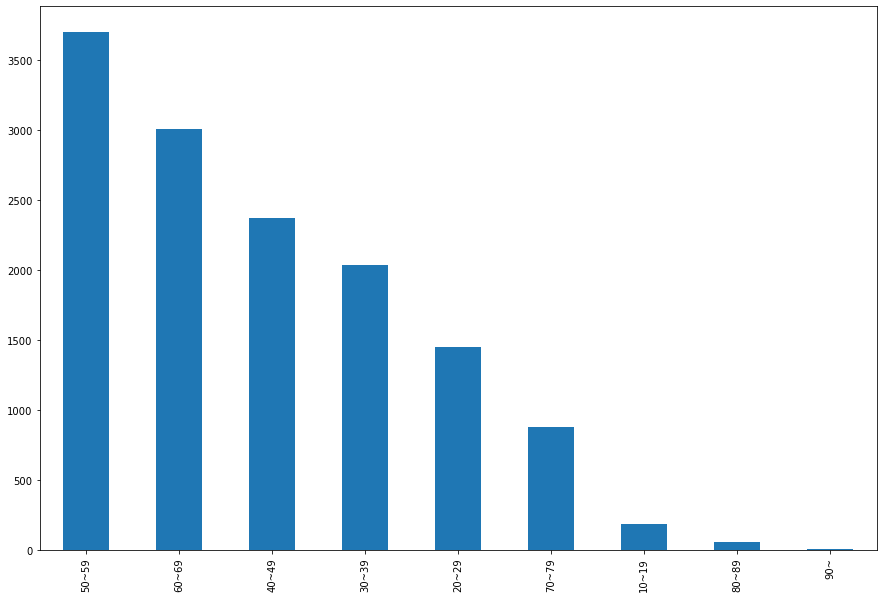

In [26]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
df['grade'].value_counts().plot.bar()

### 연령대별 음주 사고수

<AxesSubplot:>

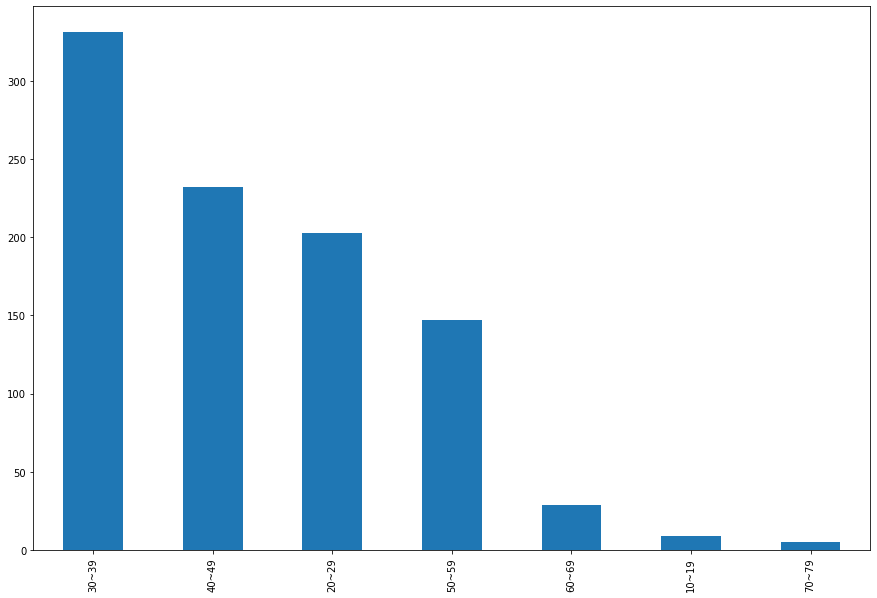

In [33]:
plt.figure(figsize=(15,10))
df[df['음주'] == 0]['grade'].value_counts().plot.bar()

In [31]:
df['음주'].valuese_counts()

0.0    956
Name: 음주, dtype: int64

In [32]:
df[df['음주'] == 0]['grade'].value_counts()

30~39    331
40~49    232
20~29    203
50~59    147
60~69     29
10~19      9
70~79      5
Name: grade, dtype: int64

### 연도별 음주 사고 증감 그래프

<AxesSubplot:>

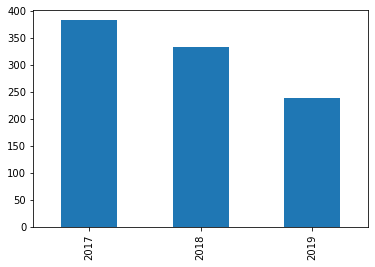

In [34]:
df[df['음주'] == 0]['년도'].value_counts().plot.bar()

### 연도별 사고 증감 그래프

<AxesSubplot:>

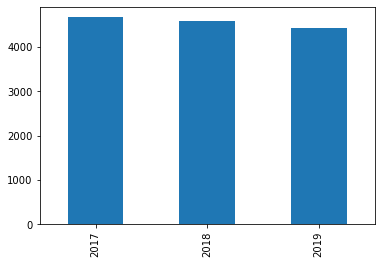

In [35]:
df['년도'].value_counts().plot.bar()

In [70]:
### 연도별 사고 증감 그래프
# df[df['grade'] == '~10']['년도'].value_counts().plot.bar()

# df[df['grade'] == '10~19']['년도'].value_counts().plot.bar()
# df[df['grade'] == '20~29']['년도'].value_counts().plot.bar()
# df[df['grade'] == '30~39']['년도'].value_counts().plot.bar()
# df[df['grade'] == '40~49']['년도'].value_counts().plot.bar()
# df[df['grade'] == '50~59']['년도'].value_counts().plot.bar()
# df[df['grade'] == '60~69']['년도'].value_counts().plot.bar()
# df[df['grade'] == '70~79']['년도'].value_counts().plot.bar()
# df[df['grade'] == '80~89']['년도'].value_counts().plot.bar()
# df[df['grade'] == '90~']['년도'].value_counts().plot.bar()

### 사고등급별 법규위반 빈도수

<AxesSubplot:xlabel='사고등급', ylabel='count'>

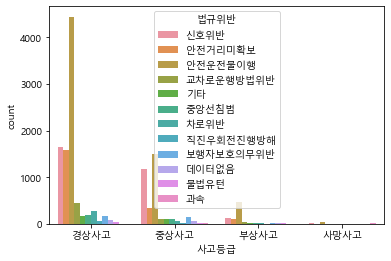

In [62]:
#import seaborn as sns
sns.countplot(data=df, x='사고등급', hue='법규위반')

### 연도별 연령별 사고 빈도수

<AxesSubplot:xlabel='grade', ylabel='count'>

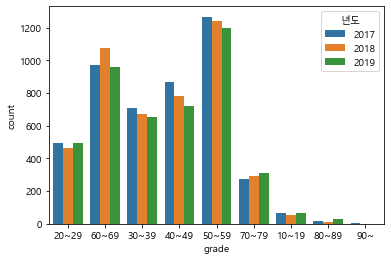

In [63]:
sns.countplot(data=df, x='grade', hue='년도')

### 연도별 음주 사고 운전자

<AxesSubplot:xlabel='class', ylabel='count'>

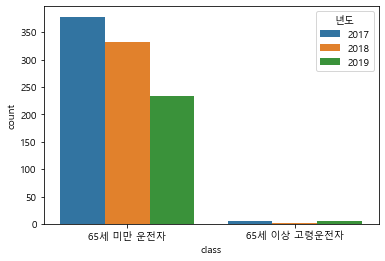

In [15]:
sns.countplot(data=df[df['음주'] == 0], x='class', hue='년도')

### 연도별 고령/비고령 운전자 사고수

<AxesSubplot:xlabel='class', ylabel='count'>

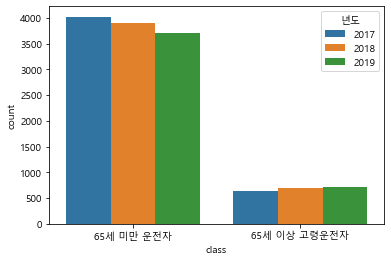

In [65]:
sns.countplot(data=df, x='class', hue='년도')

In [81]:
# w="요일"

# temp = df[[ w , "target"]].copy()
# # temp["FLAG_OWN_CAR"] = temp["FLAG_OWN_CAR"].apply(lambda x: (x / -365) if x < 0 else 0)
# temp_1 = temp.loc[temp["target"] == 1, [ w ]]
# temp_0 = temp.loc[temp["target"] == 0, [ w ]]
# plt.figure(figsize=(15, 10))

# sns.kdeplot(data=temp_1, 
#             x = w, 
#             label="65세 이상 고령운전자", 
#             shade=True, # 하단 밀도 표시 여부
#             color="darkred", # 색
#             bw=0.3, # histogram에서 선을 연결할 때 얼마나 완만하게 그릴지
#             )
# sns.kdeplot(data=temp_0, 
#             x = w, 
#             label="65세 미만 운전자", 
#             color="darkblue", # 색
#             shade=True,
#             bw=0.3, # histogram에서 선을 연결할 때 얼마나 완만하게 그릴지
#             )
# # plt.xlim(0, 5)
# plt.legend()
# # plt.xlabel("", fontsize=13)
# plt.ylabel("비중", fontsize=13)
# plt.title("")

### 요일별 고령/비고령 운전자 사고수

<AxesSubplot:xlabel='target', ylabel='count'>

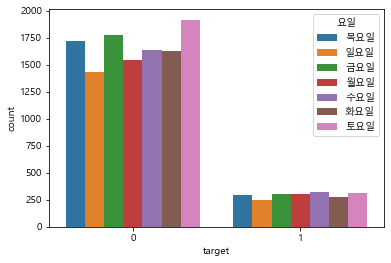

In [77]:
sns.countplot(data=df, x='target', hue='요일')

### 요일별 고령운전자 사고수

<AxesSubplot:xlabel='target', ylabel='count'>

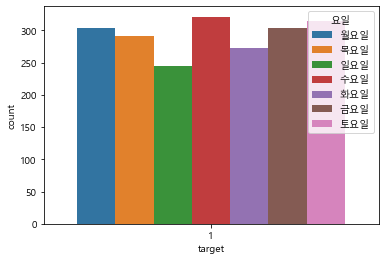

In [13]:
sns.countplot(data=df[df['target'] == 1], x='target', hue='요일')

### 고령운전자 나이대별 수 (고령운전자 기준 65)
60 - 69  --> 65 -69 

<AxesSubplot:>

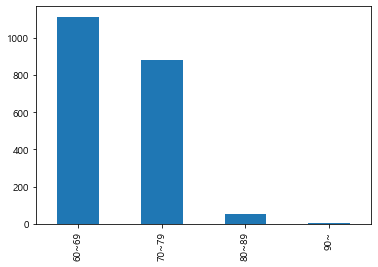

In [78]:
df[df['target'] == 1]['grade'].value_counts().plot.bar()

### 고령운전자 요일대별 사고수 (빈도순)

<AxesSubplot:>

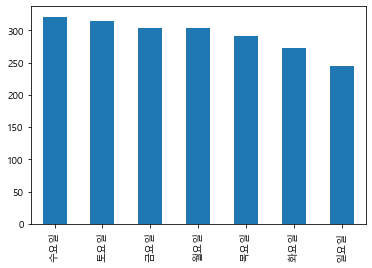

In [79]:
df[df['target'] == 1]['요일'].value_counts().plot.bar()

### 고령운전자 시간대별 사고수 (빈도순)

<AxesSubplot:>

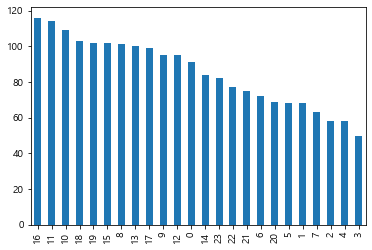

In [82]:
df[df['target'] == 1]['시각'].value_counts().plot.bar()

### 기상상태별 고령운전자 사고수

<AxesSubplot:>

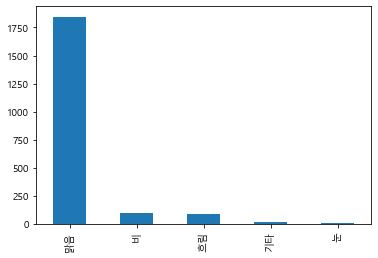

In [83]:
df[df['target'] == 1]['기상상태'].value_counts().plot.bar()

### 사고형태별 고령운전자 사고수

<AxesSubplot:>

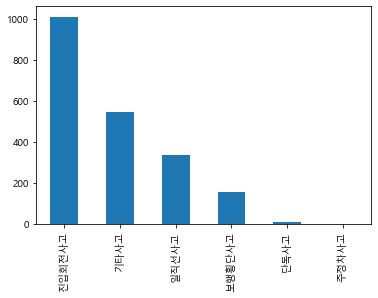

In [84]:
df[df['target'] == 1]['사고형태'].value_counts().plot.bar()

### 고령운전자 사망자수 별 사고 건수

<AxesSubplot:>

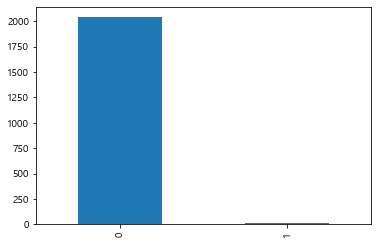

In [85]:
df[df['target'] == 1]['사망자수'].value_counts().plot.bar()

### 고령운전자 중상자수 별 사건수

<AxesSubplot:>

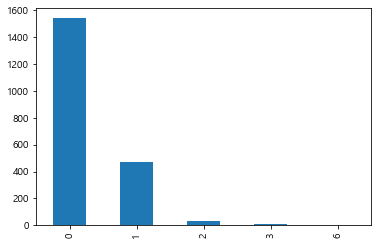

In [86]:
df[df['target'] == 1]['중상자수'].value_counts().plot.bar()

### 고령운전자 월 사고건수 (빈도순)

<AxesSubplot:>

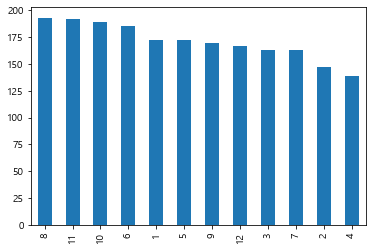

In [87]:
df[df['target'] == 1]['월'].value_counts().plot.bar()

### 고령운전자 성별수

<AxesSubplot:>

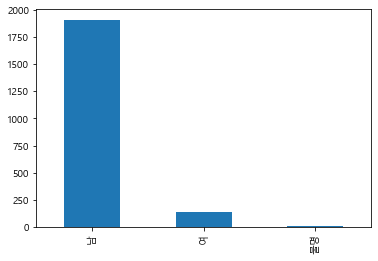

In [88]:
df[df['target'] == 1]['성별'].value_counts().plot.bar()

### 경력별 사고낸 고령운전자 수

<AxesSubplot:>

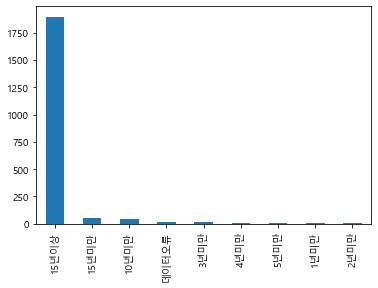

In [89]:
df[df['target'] == 1]['경력'].value_counts().plot.bar()

### 고령운전자 음주 사고수

<AxesSubplot:>

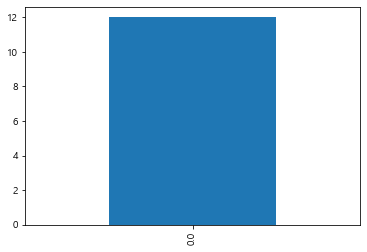

In [90]:
df[df['target'] == 1]['음주'].value_counts().plot.bar()

### 차종별 사고 고령운전자 수

<AxesSubplot:>

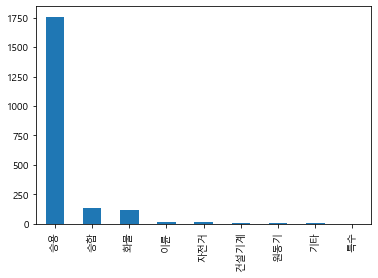

In [91]:
df[df['target'] == 1]['종별'].value_counts().plot.bar()

### 용도별 사고 고령운전자 수

<AxesSubplot:>

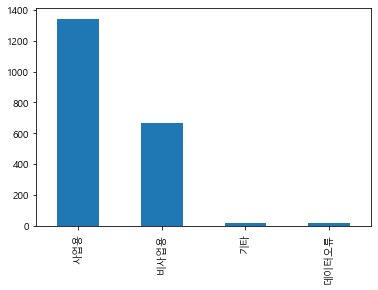

In [92]:
df[df['target'] == 1]['용도'].value_counts().plot.bar()

###  관련자(피해자,사고관련자 등 )별 고령운전자 사고 수

<AxesSubplot:>

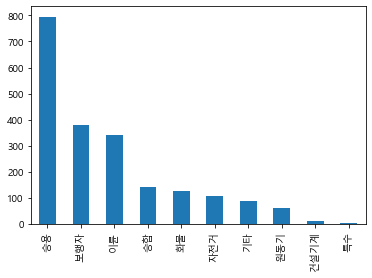

In [93]:
df[df['target'] == 1]['관련자2'].value_counts().plot.bar()

### 일광상태별 고령운전자 사고수

<AxesSubplot:>

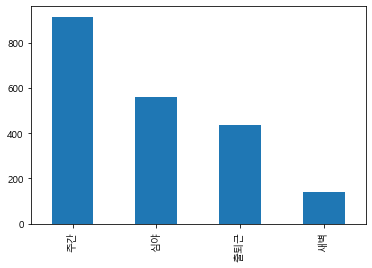

In [95]:
df[df['target'] == 1]['일광상태'].value_counts().plot.bar()

### 사고유형1 별 고령운전자 사고수

<AxesSubplot:>

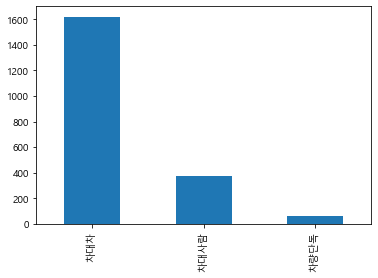

In [96]:
df[df['target'] == 1]['사고유형1'].value_counts().plot.bar()

### 사고유형1 별 고령운전자 사고수

<AxesSubplot:>

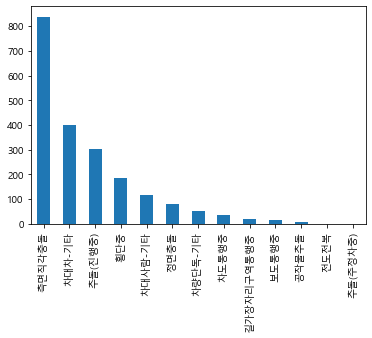

In [235]:
df[df['target'] == 1]['사고유형2'].value_counts().plot.bar()

### 법규위반별 고령운전자 사고수

<AxesSubplot:>

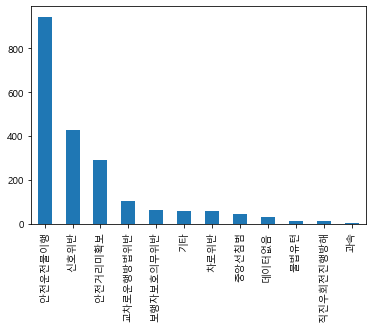

In [98]:
df[df['target'] == 1]['법규위반'].value_counts().plot.bar()

### 고령/비고령 운전자의 안전운전불이행 중 사고유형별 사건수

<AxesSubplot:>

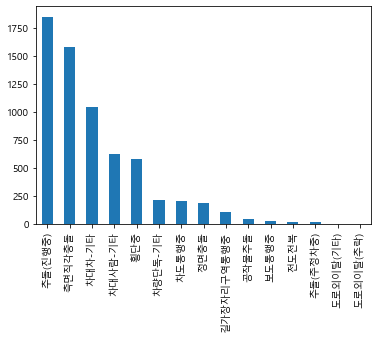

In [236]:
df[df['법규위반'] == '안전운전불이행']['사고유형2'].value_counts().plot.bar()

### 고령 운전자의 안전운전불이행 중 사고유형별 사건수
측면직각충동(시야 능력 현저한 것을 확인할수있음)

<AxesSubplot:>

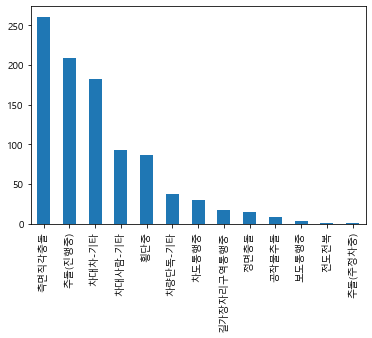

In [238]:
df[(df['법규위반'] == '안전운전불이행') & (df['target'] == 1 )]['사고유형2'].value_counts().plot.bar()

### 시내 및 시외 별 고령운전자 사고수

<AxesSubplot:>

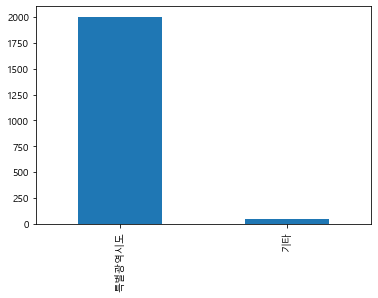

In [99]:
df[df['target'] == 1]['도로종류'].value_counts().plot.bar()

### 사고다발지점별 고령운전자 사고수(빈도순)

<AxesSubplot:>

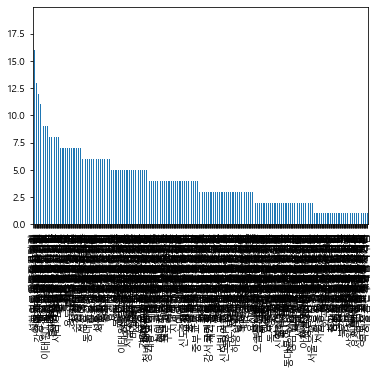

In [100]:
df[df['target'] == 1]['지점명'].value_counts().plot.bar()

### 자치구별 고령운전자 사고수

<AxesSubplot:>

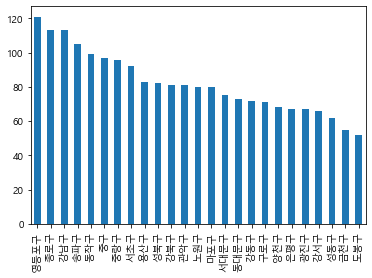

In [234]:
df[df['target'] == 1]['자치구'].value_counts().plot.bar()

### 자치구별 비고령운전자 사고수

<AxesSubplot:>

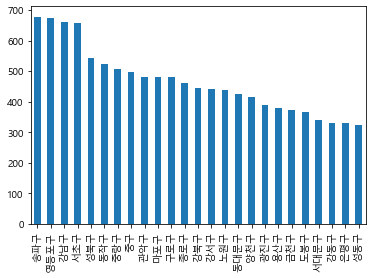

In [255]:
df[df['target'] == 0]['자치구'].value_counts().plot.bar()

### 연도별 비고령 운전자 사고수 (빈도순)

<AxesSubplot:>

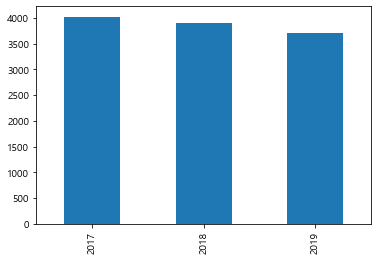

In [257]:
df[df['target'] == 0 ]['년도'].value_counts().plot.bar()

### 연도별 고령 운전자 사고수 (빈도순)

<AxesSubplot:>

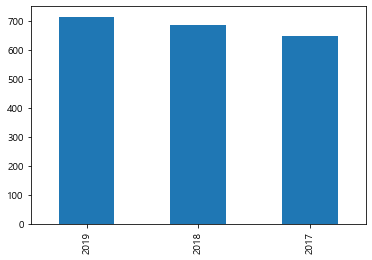

In [19]:
df[df['target'] == 1 ]['년도'].value_counts().plot.bar()

In [224]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '년도', '월', '일', '요일', '시각', '사고등급',
       '사망자수', '중상자수', '경상자수', '부상자수', '연령', '성별', '경력', '음주', '종별', '용도',
       '관련자2', '사고형태', '기상상태', '일광상태', '사고유형1', '사고유형2', '법규위반', '도로종류', '지점명',
       '위도', '경도', '자치구', 'Unnamed: 0.1.1', '0', '0.1', '0.0', 'grade',
       'class', 'target'],
      dtype='object')

In [228]:
df['target'].unique()

array([0], dtype=int64)

In [248]:
regis.columns

Index(['기간', '연령별', '1종_대형', '1종_보통', '1종_소형', '1종_특수', '2종_보통', '2종_보통',
       '2종_원동기'],
      dtype='object')

In [20]:
regis.columns

Index(['기간', '연령별', '계', '소계', '1종_대형', '1종_보통', '1종_소형', '1종_특수', '소계.1',
       '2종_보통', '2종_소형', '2종_원동기'],
      dtype='object')

In [27]:
regis['연령별'].unique()

array(['합계', '16-19세', '20-24세', '25-29세', '30-34세', '35-39세', '40-44세',
       '45-49세', '50-54세', '55-59세', '60-64세', '65-69세', '70-74세',
       '75-79세', '80세이상'], dtype=object)

In [33]:
grades = [] #리스트 생성
for row in regis['연령별'] :
    if row >= '65-69세': 
        grades.append('고령운전자')
    elif row >= '70-74세': 
        grades.append('고령운전자')
    elif row >= '75-79세': 
        grades.append('고령운전자')
    elif row >= '80세이상': 
        grades.append('고령운전자')
    else : 
        grades.append('비고령운전자') 
regis['grade'] = grades #grade열에 순차대로 원소를 대입

In [34]:
regis

,기간,연령별,계,소계,1종_대형,1종_보통,1종_소형,1종_특수,소계.1,2종_보통,2종_소형,2종_원동기,grade
0,2017,합계,7712062,3644317,256628,3346556,122,41011,4067745,3721811,98848,247086,고령운전자
1,2017,16-19세,37171,13103,63,13027,-,13,24068,17521,314,6233,비고령운전자
2,2017,20-24세,379849,151434,6617,144059,-,758,228415,205048,3113,20254,비고령운전자
3,2017,25-29세,655296,301034,15233,283904,-,1897,354262,317441,8546,28275,비고령운전자
4,2017,30-34세,736690,379629,17441,360031,-,2157,357061,318641,13822,24598,비고령운전자
5,2017,35-39세,846979,452937,22436,426896,-,3605,394042,350034,18771,25237,비고령운전자
6,2017,40-44세,899735,422117,24183,393285,-,4649,477618,435608,16766,25244,비고령운전자
7,2017,45-49세,1017259,472927,32547,433653,-,6727,544332,512579,13749,18004,비고령운전자
8,2017,50-54세,858577,406785,33003,367853,-,5929,451792,423628,9498,18666,비고령운전자
9,2017,55-59세,857522,406075,36957,363547,-,5571,451447,422027,6562,22858,비고령운전자


In [46]:
# sns.countplot(data=regis, x='grade', hue='기간', palette='husl')
# count 안됨

데이터에 따른 그래프
우선 데이터의 형태에 따라 어떤 종류의 그래프를 사용하는 것이 좋은지 알아보겠습니다.

1차원 데이터 + 실수값, 실수 분포 플롯
-> 커너밀도, 러그, rugplot, kdeplot, distplot

카테고리별 데이터의 양 확인
-> countplot

다차원 데이터 (변수가 여러 개)
-> 2차원 실수형 데이터 : 스캐터 플롯(jointplot)
-> 3차원 이상의 실수형 데이터 : pairplot(그리드 형태로 출력)
-> 만약 카테고리형이 포함되어 있으면 hue 속성 활용
-> 2차원 카테고리형 데이터 : heatmap

https://chancoding.tistory.com/12

In [44]:
# sns.pairplot(regis, hue='grade', palette='husl')
# plt.show()
# # https://pinkwink.kr/986
# xx

In [45]:
# sns.jointplot('grade', '기간', data=regis, )
# plt.show()
# xx

In [78]:
regis_sum =regis.pivot_table('계', index=['기간','grade'], aggfunc='sum')
regis_sum.drop(regis[regis['연령별'] == '합계'].index, inplace=True)
regis_sum.reset_index(inplace=True)
regis_sum

계
기간   grade          
2017 고령운전자    775106
     비고령운전자  6936956
2018 고령운전자    847014
     비고령운전자  6911046
2019 고령운전자    912500
     비고령운전자  6898368
2020 고령운전자   1001483
     비고령운전자  6863059

In [61]:
# regis.to_csv('regis.csv', encoding='utf-8-sig')

### 서울시 연도별 고령/비고령 면허취득자 수 

<AxesSubplot:xlabel='기간,grade'>

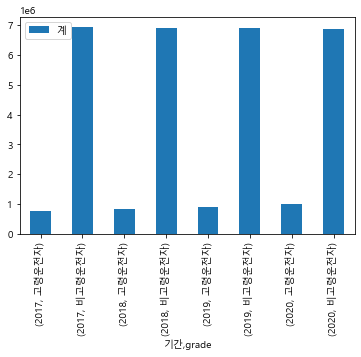

In [79]:
regis_sum.plot.bar()

### 고령운전자 연도별 추이

<AxesSubplot:>

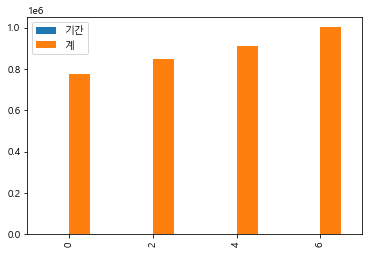

In [93]:
regis_sum[regis_sum['grade'] == '고령운전자'].plot.bar()

In [ ]:
regis_sum[regis_sum['grade'] == '고령운전자'].plot.bar()

Index(['계'], dtype='object')

### 지도 시각화